#      Casos de covid cidades com UTFPR       
                                            
  Casos mensais                              
  Casos mensais de mortes                    


Bicliotecas utilizadas:

• pandas

• Plotly

O programa foi projetado sobre a database disponibilizada com o nome de "caso_full" no repositório de dados públicos disponibilizados em formato acessível na fonte htts://brasil.io

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Com o objetivo de analisar os casos de covid apenas as cidades que possuem campus UTFPR geramos um arquivo "UTFPR.csv" com as cidades desejadas. 

In [2]:
archive = pd.read_csv('casos.csv')
archive.query('city == "Apucarana" | city == "Campo Mourão" | city == "Cornélio Procópio" | '
                'city == "Curitiba" | city == "Dois Vizinhos" | city == "Francisco Beltrão" | '
                'city == "Guarapuava" | city == "Londrina" | city == "Medianeira" | '
                'city == "Pato Branco" | city == "Ponta Grossa" | city == "Santa Helena" | '
                'city == "Toledo" ').to_csv('UTFPR.csv', encoding='utf-8', index=False)


Realiza a leitura do dataframe que possui apenas as cidades que possuem UTFPR do arquivo "UTFPR.csv"

In [3]:
cidadesUTF = pd.read_csv('UTFPR.csv')
df = pd.DataFrame(cidadesUTF)

Para facilitar o processo da análise foi realizado a criação de duas novas colunas com o Dia e Mes separadamente.

In [4]:
year = (df['Data'].str[:4])
df['year'] = year
month = (df['Data'].str[5:7])
df['month'] = month

df.to_csv("UTFPR.csv")

Com o principal intuito de analisar e comparar os casos e a crescente de covid das cidades, foi realizado a divisão em 2 partes, para o ano de 2020 e para 2021.

In [5]:
casosUTFPR = pd.read_csv('UTFPR.csv', index_col = 0, parse_dates = True)



### » Tabela de casos mensal do ano de 2020 


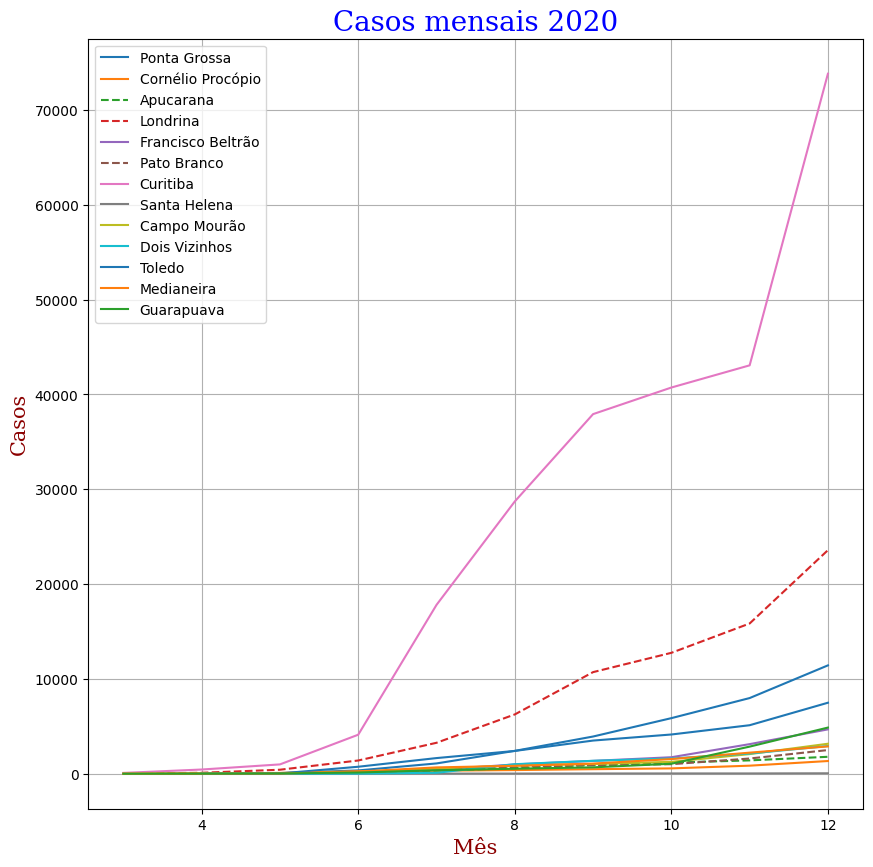

In [6]:
cidades = {"Apucarana" , "Campo Mourão" , "Cornélio Procópio" , "Curitiba" , "Dois Vizinhos" , "Francisco Beltrão" , "Guarapuava" , "Londrina" , "Medianeira" , "Pato Branco" , "Ponta Grossa" , "Santa Helena" , "Toledo"}

casosMensais2020 = casosUTFPR.loc[casosUTFPR['year'] == 2020]
df2020 = pd.DataFrame(casosMensais2020)
pd.set_option('mode.chained_assignment', None)

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}


plt.figure(figsize=(10, 10)) 

for city in cidades:
    casosCity2020 = df2020.loc[df2020['city'] == city]
    casosCity2020.sort_values("month")
    casosCity2020.drop_duplicates(subset = "month", keep = 'last', inplace = True)
    X = casosCity2020["month"]
    y = casosCity2020['last_available_confirmed']
    if city == "Apucarana" or city == "Londrina" or city == "Pato Branco":
        display(plt.plot(X, y, '--' , label = city)) 
    else: 
        display(plt.plot(X, y, label = city)) 

# Alterando algumas propriedades da visualização:
# Título
plt.title("Casos mensais 2020", fontdict = font1)
# Quadriculado
plt.grid()
# Rótulo nos eixos
plt.xlabel("Mês", fontdict = font2)
plt.ylabel("Casos", fontdict = font2)

# Ticks de rótulo
plt.legend()
plt.show()


É possivel observar que os casos ocorridos em Curitiba é exorbitante comparada as demais cidades, crescente gradativa bem alta a partir do mês de Junho até dezembro, iniciando com media de 5 mil casos e finalizando o ano com o pico de mais de 70 mil casos, seguindo diante a Londrina que apesar de altos casos comparado aos demais, em relação a Curitiba não é alto a taxa, chegando ao pico de pouco mais de 22 mil casos ao final do ano e as demais cidades finalizando o ano com menos de 15 mil casos.

### » Tabela de casos mensalmente do ano de 2021

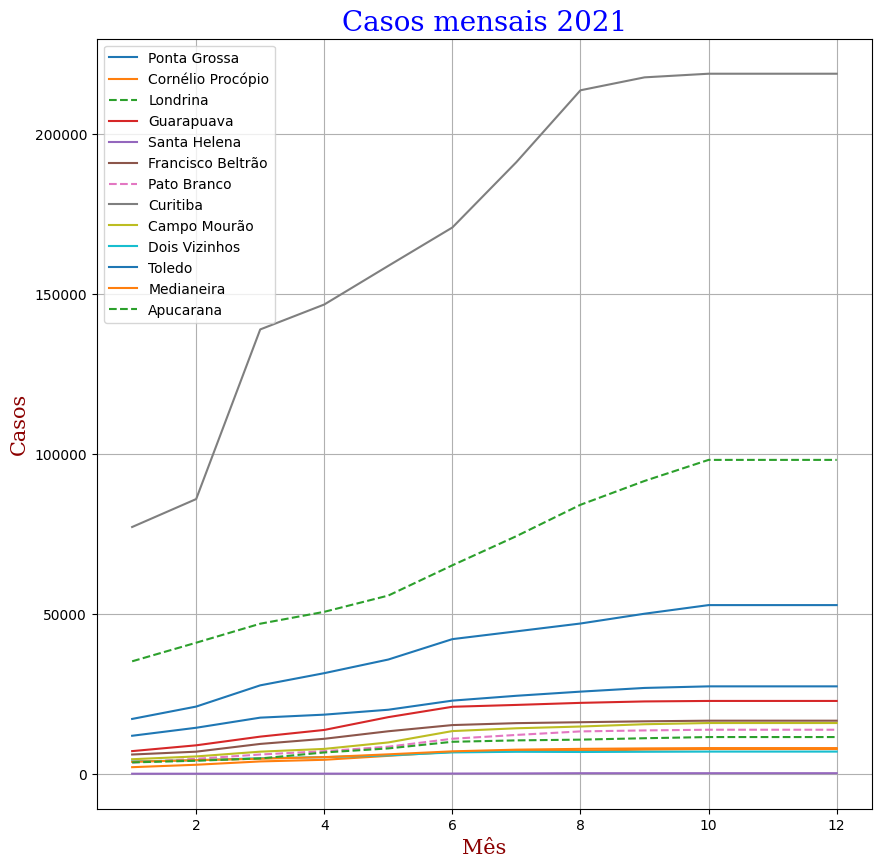

In [7]:
cidades = {"Apucarana" , "Campo Mourão" , "Cornélio Procópio" , "Curitiba" , "Dois Vizinhos" , "Francisco Beltrão" , "Guarapuava" , "Londrina" , "Medianeira" , "Pato Branco" , "Ponta Grossa" , "Santa Helena" , "Toledo"}

casosMensais2021 = casosUTFPR.loc[casosUTFPR['year'] == 2021]
df2021 = pd.DataFrame(casosMensais2021)
pd.set_option('mode.chained_assignment', None)

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}


plt.figure(figsize=(10, 10)) 

for city in cidades:
    casosCity2021 = df2021.loc[df2021['city'] == city]
    casosCity2021.sort_values("month")
    casosCity2021.drop_duplicates(subset = "month", keep = 'last', inplace = True)
    X = casosCity2021["month"]
    y = casosCity2021['last_available_confirmed']
    if city == "Apucarana" or city == "Londrina" or city == "Pato Branco":
        display(plt.plot(X, y, '--' , label = city)) 
    else: 
        display(plt.plot(X, y, label = city)) 

# Alterando algumas propriedades da visualização:
# Título
plt.title("Casos mensais 2021", fontdict = font1)
# Quadriculado
plt.grid()
# Rótulo nos eixos
plt.xlabel("Mês", fontdict = font2)
plt.ylabel("Casos", fontdict = font2)

# Ticks de rótulo
plt.legend()
plt.show()


Com o início de 2021 os casos continuaram crescente gradualmente com o maior caso em Curitiba ultrapassando 220 mil pessoas no final do mês de julho, porém também é possivel visualizar que a partir do mês 9 os casos começaram a se estabilizar apesar de ainda ocorrer um crescimento da taxa.

### » Tabela de casos de morte mensalmente do ano de 2020

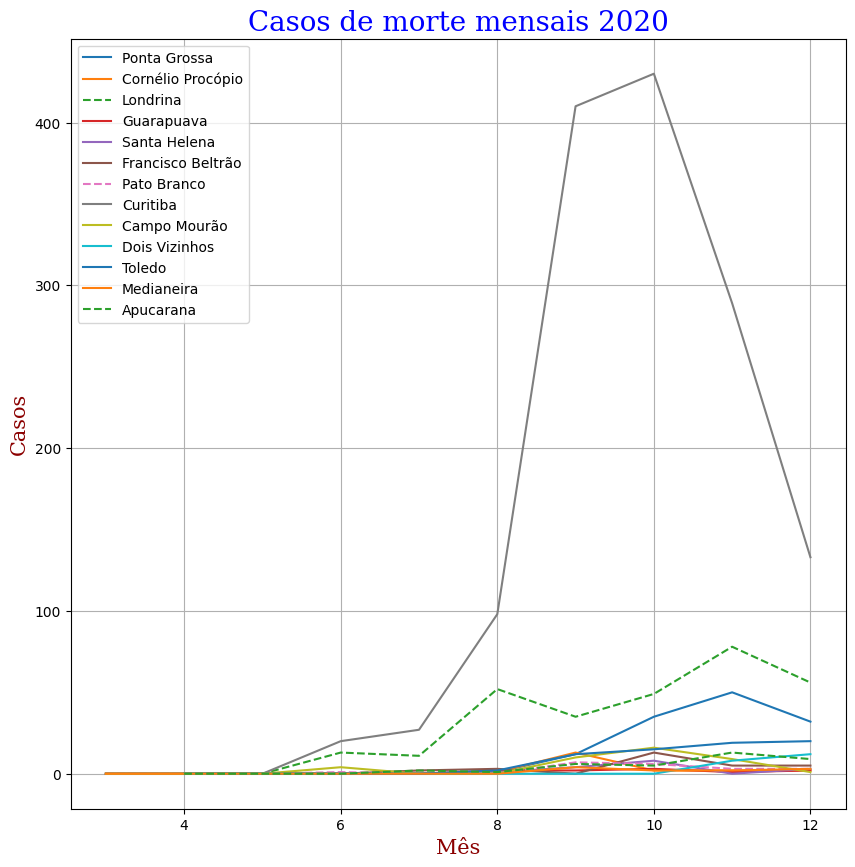

In [8]:
cidades = {"Apucarana" , "Campo Mourão" , "Cornélio Procópio" , "Curitiba" , "Dois Vizinhos" , "Francisco Beltrão" , "Guarapuava" , "Londrina" , "Medianeira" , "Pato Branco" , "Ponta Grossa" , "Santa Helena" , "Toledo"}
meses = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
casosMensais2020 = casosUTFPR.loc[casosUTFPR['year'] == 2020]
df2020 = pd.DataFrame(casosMensais2020)
pd.set_option('mode.chained_assignment', None)

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.figure(figsize=(10, 10)) 

for city in cidades:
    mes = np.zeros([12,1])
    casosCity2020 = df2020.loc[df2020['city'] == city]
    casosCity2020.sort_values("month")
    casosCity2020.drop_duplicates(subset = "month", keep = 'last', inplace = True)
    casosCity2020.reset_index(inplace=True, drop=True)
    for mese in meses:
        casos2020 = df2020.loc[df2020['city'] == city]
        casosMortes2020 = casos2020[casos2020['month'] == mese]
        totalMortes = casosMortes2020['new_deaths'].sum()
        mes[mese-1] = totalMortes
        aux = pd.DataFrame(data = mes, columns = ['Total Morte'])
    extraindo = aux['Total Morte']
    casosCity2020 = casosCity2020.join(aux)

    X = casosCity2020["month"]
    y = casosCity2020['Total Morte']
    if city == "Apucarana" or city == "Londrina" or city == "Pato Branco":
        display(plt.plot(X, y, '--' , label = city)) 
    else: 
        display(plt.plot(X, y, label = city)) 

# Alterando algumas propriedades da visualização:
# Título
plt.title("Casos de morte mensais 2020", fontdict = font1)
# Quadriculado
plt.grid()
# Rótulo nos eixos
plt.xlabel("Mês", fontdict = font2)
plt.ylabel("Casos", fontdict = font2)

# Ticks de rótulo
plt.legend()
plt.show()



» Tabela de casos de morte mensalmente do ano de 2021


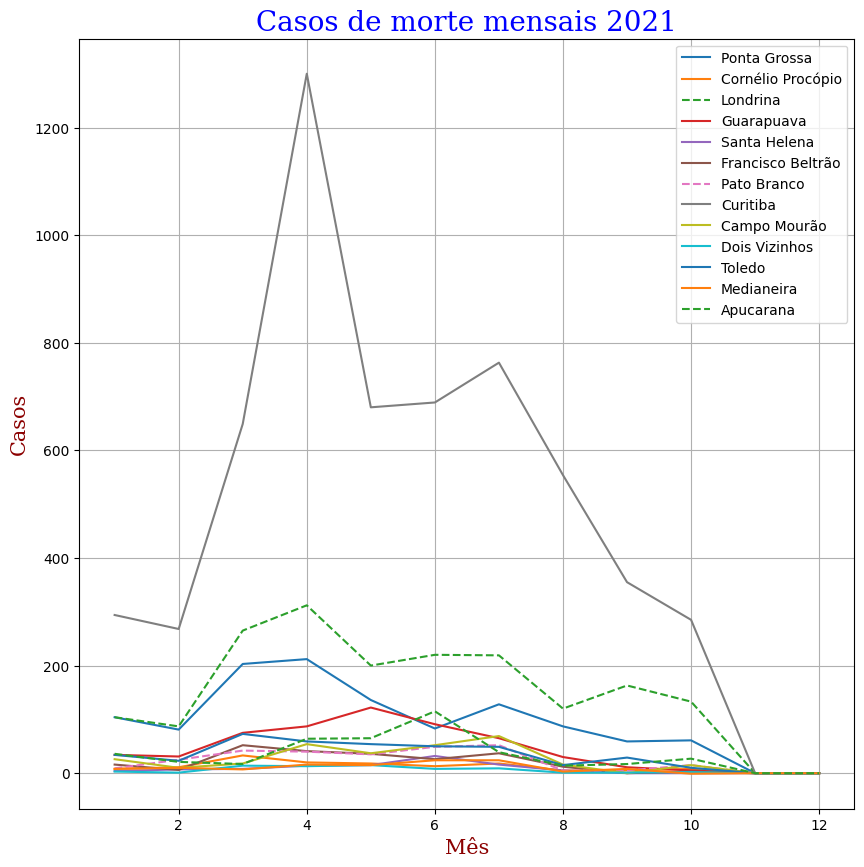

In [9]:
cidades = {"Apucarana" , "Campo Mourão" , "Cornélio Procópio" , "Curitiba" , "Dois Vizinhos" , "Francisco Beltrão" , "Guarapuava" , "Londrina" , "Medianeira" , "Pato Branco" , "Ponta Grossa" , "Santa Helena" , "Toledo"}
meses = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
casosMensais2021 = casosUTFPR.loc[casosUTFPR['year'] == 2021]
df2021 = pd.DataFrame(casosMensais2021)
pd.set_option('mode.chained_assignment', None)

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.figure(figsize=(10, 10)) 

for city in cidades:
    mes = np.zeros([12,1])
    casosCity2021 = df2021.loc[df2021['city'] == city]
    casosCity2021.sort_values("month")
    casosCity2021.drop_duplicates(subset = "month", keep = 'last', inplace = True)
    casosCity2021.reset_index(inplace=True, drop=True)
    for mese in meses:
        casos2021 = df2021.loc[df2021['city'] == city]
        casosMortes2021 = casos2021[casos2021['month'] == mese]
        totalMortes = casosMortes2021['new_deaths'].sum()
        mes[mese-1] = totalMortes
        aux = pd.DataFrame(data = mes, columns = ['Total Morte'])
    extraindo = aux['Total Morte']
    casosCity2021 = casosCity2021.join(aux)

    X = casosCity2021["month"]
    y = casosCity2021['Total Morte']
    if city == "Apucarana" or city == "Londrina" or city == "Pato Branco":
        display(plt.plot(X, y, '--' , label = city)) 
    else: 
        display(plt.plot(X, y, label = city)) 

# Alterando algumas propriedades da visualização:
# Título
plt.title("Casos de morte mensais 2021", fontdict = font1)
# Quadriculado
plt.grid()
# Rótulo nos eixos
plt.xlabel("Mês", fontdict = font2)
plt.ylabel("Casos", fontdict = font2)

# Ticks de rótulo
plt.legend()
plt.show()
